In [2]:
import numpy as np
import os,sys
import shutil

sys.path.append(r"C:\projects\OpenVisus\build\RelWithDebInfo")
import OpenVisus as ov

sys.path.append(r"C:\projects\openvisuspy\src")
import openvisuspy as ovy

os.environ["VISUS_VERBOSE_DISKACCESS"]="0"
os.environ["VISUS_CPP_VERBOSE"]="0"

# since I am the only one writing...
os.environ["VISUS_DISABLE_WRITE_LOCK"]="1"

GB=1024*1024*1024
memsize=8*GB
N=memsize//8
print(f"N={N:,}")

signal = np.random.uniform(low=0.0,high=1.0,size=[N])
print("NUMPY dtype",signal.dtype,"shape",signal.shape,"vmin",np.min(signal),"vmax",np.max(signal))

idx_filename=r'D:/visus-datasets/signal1d/visus.idx'
shutil.rmtree(os.path.dirname(idx_filename), ignore_errors=True)
db=ov.CreateIdx(url=idx_filename, dims=[N],fields=[ov.Field('data',ov.convert_dtype(signal.dtype),'row_major')], compression="raw", arco=f"{1024*1024}")
assert(os.path.isfile(idx_filename))

logic_box=logic_box=ov.BoxNi(ov.PointNi([0]),ov.PointNi([N]))
db.write(signal,  logic_box=logic_box)
print("IDX write uncompressed done","logic_box",logic_box.toString())

# use the python version
db=ov.LoadDataset(idx_filename)
db.compressDataset("zip") 
print("compress dataset done")

data=db.read(logic_box=logic_box)
print("IDX read done","dtype",data.dtype,"shape",data.shape,"vmin",np.min(data),"vmax",np.max(data))
assert(list(data.shape)==[N])
assert(np.min(data)==np.min(signal))
assert(np.max(data)==np.max(signal))
assert(data.dtype==signal.dtype)

N=1,073,741,824
NUMPY dtype float64 shape (1073741824,) vmin 1.6153667292684304e-10 vmax 0.9999999999331494
IDX write uncompressed done logic_box 0 1073741824
compress dataset done
IDX read done dtype float64 shape (1073741824,) vmin 1.6153667292684304e-10 vmax 0.9999999999331494


logic_box ([0], [134217728])
db.getMaxResolution() 27
IDX read done dtype=float64 shape=(256,) vmin=0.0003777226978680659 vmax=0.9978663834143826


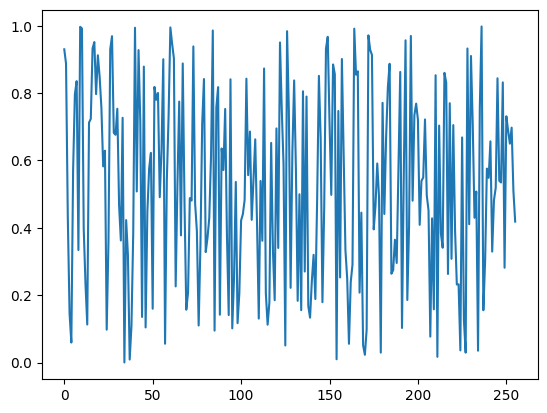

In [5]:
import matplotlib.pyplot as plt

def ShowSignal(data):
    fig, ax = plt.subplots()
    ax.plot(np.arange(data.shape[0]), data)
    my_cmap = plt.get_cmap("viridis")
    plt.show()
    
logic_box=db.getLogicBox()
print("logic_box",logic_box)
print("db.getMaxResolution()",db.getMaxResolution())

resolution=8
data=db.read(logic_box=logic_box, max_resolution=resolution)
print(f"IDX read done dtype={data.dtype} shape={data.shape} vmin={np.min(data)} vmax={np.max(data)}")
ShowSignal(data)

Copy blocks to S3. For example:

```

python -m pip install --quiet awscli-plugin-endpoint
aws s3 sync --deub --endpoint-url https://maritime.sealstorage.io/api/v0/s3 --profile sealstorage --size-only  /mnt/d/visus-datasets/signal1d/ s3://utah/visus-datasets/signal1d/
```
